In [2]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [3]:
import pandas as pd
import chardet

nombre_archivo = DATOS_DIR + 'Globos.csv'

with open(nombre_archivo, 'rb') as  f:
    result = chardet.detect(f.read())

df = pd.read_csv(nombre_archivo, encoding=result["encoding"])
display(df)

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,Amarillo,Chico,Si,Adulto,Si
1,Amarillo,Chico,Si,Niño,Si
2,Amarillo,Chico,No,Adulto,No
3,Amarillo,Chico,No,Niño,No
4,Amarillo,Grande,Si,Adulto,Si
5,Amarillo,Grande,Si,Niño,Si
6,Amarillo,Mediano,No,Adulto,No
7,Amarillo,Mediano,No,Niño,No
8,Rojo,Chico,Si,Adulto,Si
9,Rojo,Chico,Si,Niño,No


In [4]:
mapeo = {
    'Color': {'Rojo': 1.0, 'Amarillo':0.0},
    'Se_estira?': {'Si':1.0, 'No':0.0},
    'Edad': {'Adulto':1.0, 'Niño':0.0},
    'Tamanio': {'Chico':0.0, 'Mediano':0.5, 'Grande':1.0}
}

df.replace(mapeo, inplace=True)
display(df)

C:\Users\Peter\AppData\Local\Temp\ipykernel_18372\2238478760.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeo, inplace=True)


,Color,Tamanio,Se_estira?,Edad,Inflado?
0,0.0,0.0,1.0,1.0,Si
1,0.0,0.0,1.0,0.0,Si
2,0.0,0.0,0.0,1.0,No
3,0.0,0.0,0.0,0.0,No
4,0.0,1.0,1.0,1.0,Si
5,0.0,1.0,1.0,0.0,Si
6,0.0,0.5,0.0,1.0,No
7,0.0,0.5,0.0,0.0,No
8,1.0,0.0,1.0,1.0,Si
9,1.0,0.0,1.0,0.0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Color       16 non-null     float64
 1   Tamanio     16 non-null     float64
 2   Se_estira?  16 non-null     float64
 3   Edad        16 non-null     float64
 4   Inflado?    16 non-null     object 
dtypes: float64(4), object(1)
memory usage: 772.0+ bytes


In [6]:
df[['Color', 'Se_estira?', 'Edad']] = df[['Color', 'Se_estira?', 'Edad']].astype(float) # en caso que alguno sea entero

# **a)**

In [11]:
import numpy as np

perceptrones = {
    "Perceptrón 1": [0.050, 0.006, -0.068, -0.047, 0.005],
    "Perceptrón 2": [-0.494, -0.003, 0.722, 0.489, -0.4943],
    "Perceptrón 3": [0.060, 0.004, 0.1278, 0.021, -0.1132],
    "Perceptrón 4": [0.296, 0.026, -0.576, -0.287, 0.371],
    "Perceptrón 5": [0.994, 0.006, -1.466, -0.989, 0.988]
}

y_true = df['Inflado?'].map({'Si': 1, 'No': 0})

# Evaluar cada perceptrón
for name, weights in perceptrones.items():
    clasificaBien = True
    
    for fila in range(len(df)):
        # Obtener los valores de entrada de la fila
        fila_data = df.iloc[fila]
        real = y_true.iloc[fila]
        
        # Calcular la salida del perceptrón
        y = (fila_data['Color'] * weights[0]) + \
            (fila_data['Tamanio'] * weights[1]) + \
            (fila_data['Se_estira?'] * weights[2]) + \
            (fila_data['Edad'] * weights[3]) + \
            weights[4]

        # Calcular la salida binaria (1 si y >= 0, de lo contrario 0)
        salida = 1 if y >= 0 else 0

        # Verificar si la clasificación es correcta
        if salida != real:
            clasificaBien = False
            break

    if clasificaBien:
        print(f'{name} funciona bien en todos los casos')
    else:
        print(f'{name} FUNCIONA MAL')

Perceptrón 1 FUNCIONA MAL
Perceptrón 2 funciona bien en todos los casos
Perceptrón 3 FUNCIONA MAL
Perceptrón 4 FUNCIONA MAL
Perceptrón 5 FUNCIONA MAL


# **b)**

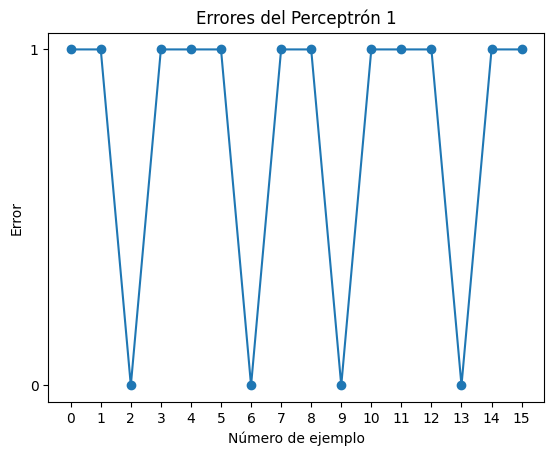

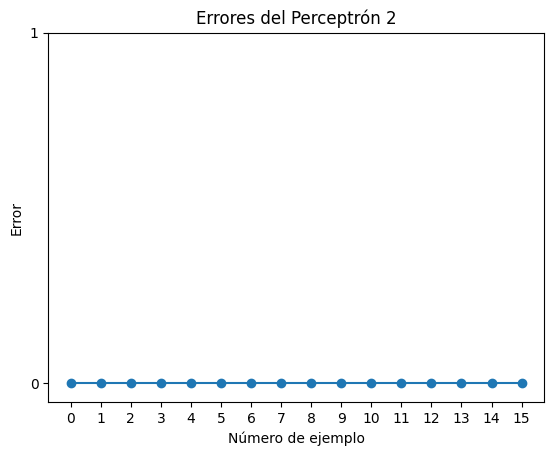

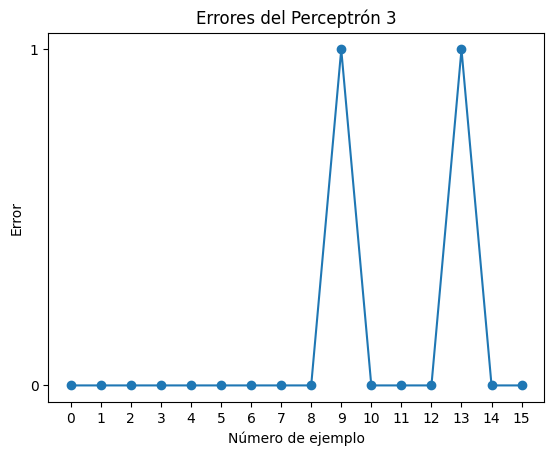

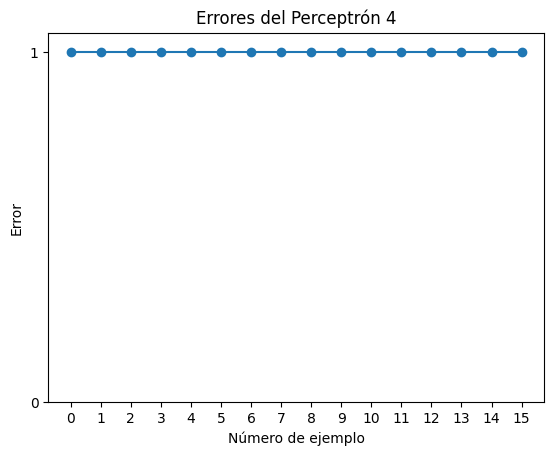

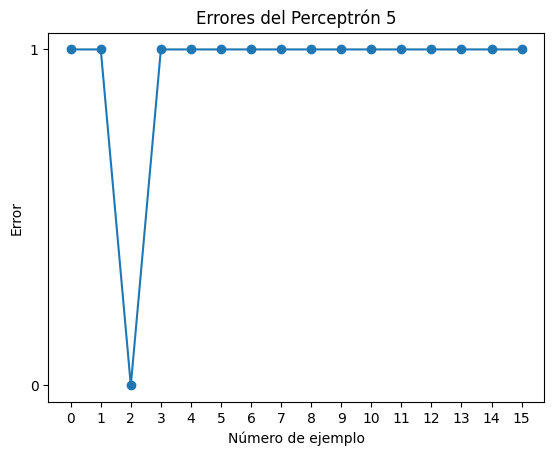

In [21]:
import matplotlib.pyplot as plt

# Evaluar cada perceptrón
for name, weights in perceptrones.items():
    errores = []
    
    for fila in range(len(df)):
        # Obtener los valores de entrada de la fila
        fila_data = df.iloc[fila]
        real = y_true.iloc[fila]
        
        # Calcular la salida del perceptrón
        y = (fila_data['Color'] * weights[0]) + \
            (fila_data['Tamanio'] * weights[1]) + \
            (fila_data['Se_estira?'] * weights[2]) + \
            (fila_data['Edad'] * weights[3]) + \
            weights[4]

        # Calcular la salida binaria (1 si y >= 0, de lo contrario 0)
        salida = 1 if y >= 0 else 0

        # Verificar si la clasificación es correcta
        if salida != real:
            errores.append(1)
        else:
            errores.append(0)
    
    # Graficar los errores
    plt.figure()
    plt.plot(range(len(errores)), errores, marker='o')
    plt.title(f'Errores del {name}')
    plt.xlabel('Número de ejemplo')
    plt.ylabel('Error')

    plt.xticks(ticks=range(len(errores)))
    plt.yticks(ticks=[0,1])
    plt.show()
